In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\\Laptop World\\Desktop\\Sentiment Analysis\\twitter_training.csv")

Read the data

In [3]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [4]:
import pandas as pd

# اقرأ الملف بدون اعتبار الصف الأول كأسماء أعمدة
df = pd.read_csv("C:\\Users\\Laptop World\\Desktop\\Sentiment Analysis\\twitter_training.csv", header=None)

# أضف أسماء الأعمدة المناسبة
df.columns = ['id', 'entity', 'sentiment', 'tweet']

print(df.head())


     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


clean

In [5]:
def clean_text(text):
    text = str(text).lower()        # تحويل لحروف صغيرة
    text = text.strip()             # إزالة المسافات الزائدة
    return text

df['clean_text'] = df['tweet'].apply(clean_text)


In [6]:
print(df.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                          clean_text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [7]:
def clean_text(text):
    text = str(text).lower()                                   # حروف صغيرة
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)        # إزالة الروابط
    text = re.sub(r'\@[\w]*', '', text)                        # إزالة المنشن
    text = re.sub(r'#', '', text)                              # إزالة الهاشتاج
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # إزالة الرموز
    text = re.sub(r'\d+', '', text)                            # إزالة الأرقام
    text = text.strip()                                        # إزالة المسافات
    return text

Simple exploratory analysis

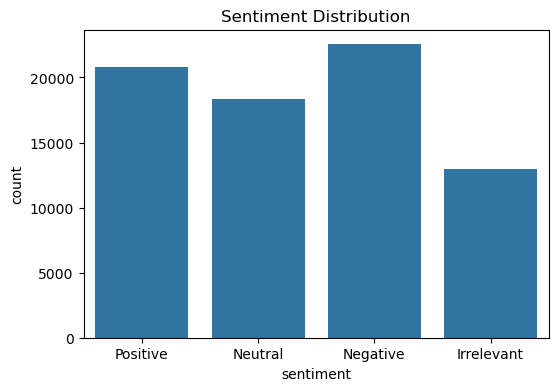

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

Data partitioning

In [9]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Text to Integer Format (TF-IDF)

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

تدريب نموذج Logistic Regression

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

Evaluation

In [12]:
y_pred = model.predict(X_test_vec)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.67      0.53      0.59      2592
    Negative       0.74      0.79      0.76      4519
     Neutral       0.67      0.64      0.66      3596
    Positive       0.69      0.75      0.72      4230

    accuracy                           0.70     14937
   macro avg       0.69      0.68      0.68     14937
weighted avg       0.70      0.70      0.69     14937



Confusion matrix

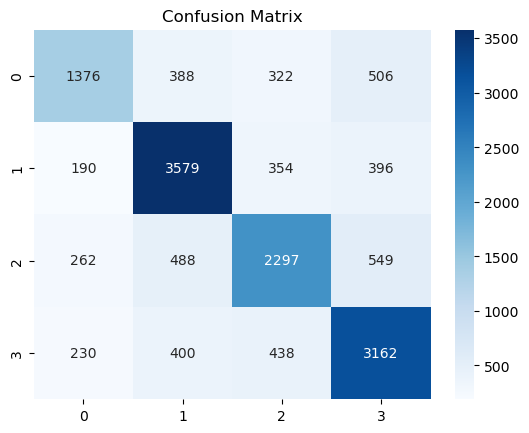

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Test on a new sentence

In [14]:
sample = ["I love this game, it's amazing!", "This is the worst thing ever!"]
sample_vec = vectorizer.transform(sample)
predictions = model.predict(sample_vec)
print("\nSample Predictions:")
for text, pred in zip(sample, predictions):
    print(f"{text} --> {pred}")


Sample Predictions:
I love this game, it's amazing! --> Positive
This is the worst thing ever! --> Negative
